In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

pd.set_option('display.max.rows',1000)

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Data Preparation

* Focus is always to understand the final data structure
* Support each step by visual analytics

### John Hopkins GITHUB csv data

In [3]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [4]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22,6/29/22,6/30/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181808,181912,181987,182033,182072,182149,182228,182324,182403,182528
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,277663,277940,278211,278504,278793,279077,279077,279167,280298,280851
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265993,266006,266015,266025,266030,266038,266049,266062,266073,266087
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43449,43774,43774,43774,43774,43774,43774,43774,43774,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,101320,101320,101320


In [5]:
pd_raw.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '6/21/22', '6/22/22', '6/23/22', '6/24/22', '6/25/22', '6/26/22',
       '6/27/22', '6/28/22', '6/29/22', '6/30/22'],
      dtype='object', length=891)

In [6]:
time_idx=pd_raw.columns[4:]

In [7]:
df_plot = pd.DataFrame({'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [8]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [9]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)

1/22/20            0
1/23/20            0
1/24/20            0
1/25/20            0
1/26/20            0
1/27/20            1
1/28/20            4
1/29/20            4
1/30/20            4
1/31/20            5
2/1/20             8
2/2/20            10
2/3/20            12
2/4/20            12
2/5/20            12
2/6/20            12
2/7/20            13
2/8/20            13
2/9/20            14
2/10/20           14
2/11/20           16
2/12/20           16
2/13/20           16
2/14/20           16
2/15/20           16
2/16/20           16
2/17/20           16
2/18/20           16
2/19/20           16
2/20/20           16
2/21/20           16
2/22/20           16
2/23/20           16
2/24/20           16
2/25/20           16
2/26/20           21
2/27/20           26
2/28/20           53
2/29/20           66
3/1/20           117
3/2/20           150
3/3/20           188
3/4/20           240
3/5/20           349
3/6/20           534
3/7/20           684
3/8/20           847
3/9/20       

In [10]:
country_list=['Albania',
              'Egypt',
              'Germany',
              'Italy',
              'Spain',
              'United Kingdom',
              'US',
             ]

In [11]:
for each in country_list:
    df_plot[each] = np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

<AxesSubplot:xlabel='date'>

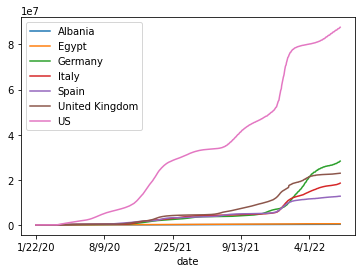

In [12]:
%matplotlib inline
df_plot.set_index('date').plot()

### Data Type Date

In [13]:
df_plot.head()

,date,Albania,Egypt,Germany,Italy,Spain,United Kingdom,US
0,1/22/20,0,0,0,0,0,0,1
1,1/23/20,0,0,0,0,0,0,1
2,1/24/20,0,0,0,0,0,0,2
3,1/25/20,0,0,0,0,0,0,2
4,1/26/20,0,0,0,0,0,0,5


In [14]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime("%m-%d-%y") for each in time_idx] # convert back to date ISO norm (str)

In [15]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
df_plot.head()

,date,Albania,Egypt,Germany,Italy,Spain,United Kingdom,US
0,2020-01-22,0,0,0,0,0,0,1
1,2020-01-23,0,0,0,0,0,0,1
2,2020-01-24,0,0,0,0,0,0,2
3,2020-01-25,0,0,0,0,0,0,2
4,2020-01-26,0,0,0,0,0,0,5


In [17]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv', sep=';',index=False)

### Relational data model - defining a primary key

In the relational model of databases, a primary key is a specific choice of a minimal set of attributes (columns) that 
uniquely specify a tuple (row) in a relation (table) (source: wiki)

A primary key's main features are:
* It must contain a unique value for each row of data.
* It cannot contain null values.

In [18]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22,6/29/22,6/30/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181808,181912,181987,182033,182072,182149,182228,182324,182403,182528
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,277663,277940,278211,278504,278793,279077,279077,279167,280298,280851
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265993,266006,266015,266025,266030,266038,266049,266062,266073,266087
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43449,43774,43774,43774,43774,43774,43774,43774,43774,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,101320,101320,101320


In [19]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                                    'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')

In [20]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22,6/29/22,6/30/22
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,181808,181912,181987,182033,182072,182149,182228,182324,182403,182528
1,no,Albania,0,0,0,0,0,0,0,0,...,277663,277940,278211,278504,278793,279077,279077,279167,280298,280851
2,no,Algeria,0,0,0,0,0,0,0,0,...,265993,266006,266015,266025,266030,266038,266049,266062,266073,266087
3,no,Andorra,0,0,0,0,0,0,0,0,...,43449,43774,43774,43774,43774,43774,43774,43774,43774,43774
4,no,Angola,0,0,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,101320,101320,101320


In [21]:
test_pd=pd_data_base.set_index(['state','country']).T

In [22]:
test_pd

state             no                                             \
country  Afghanistan Albania Algeria Andorra  Angola Antarctica   
1/22/20            0       0       0       0       0          0   
1/23/20            0       0       0       0       0          0   
1/24/20            0       0       0       0       0          0   
1/25/20            0       0       0       0       0          0   
1/26/20            0       0       0       0       0          0   
1/27/20            0       0       0       0       0          0   
1/28/20            0       0       0       0       0          0   
1/29/20            0       0       0       0       0          0   
1/30/20            0       0       0       0       0          0   
1/31/20            0       0       0       0       0          0   
2/1/20             0       0       0       0       0          0   
2/2/20             0       0       0       0       0          0   
2/3/20             0       0       0       0       0          0   
2/4/20             0       0       0       0       0          0   
2/5/20             0       0       0       0       0          0   
2/6/20             0       0       0       0       0          0   
2/7/20             0       0       0       0       0          0   
2/8/20             0       0       0       0       0          0   
2/9/20             0       0       0       0       0          0   
2/10/20            0       0       0       0       0          0   
2/11/20            0       0       0       0       0          0   
2/12/20            0       0       0       0       0          0   
2/13/20            0       0       0       0       0          0   
2/14/20            0       0       0       0       0          0   
2/15/20            0       0       0       0       0          0   
2/16/20            0       0       0       0       0          0   
2/17/20            0       0       0       0       0          0   
2/18/20            0       0       0       0       0          0   
2/19/20            0       0       0       0       0          0   
2/20/20            0       0       0       0       0          0   
2/21/20            0       0       0       0       0          0   
2/22/20            0       0       0       0       0          0   
2/23/20            0       0       0       0       0          0   
2/24/20            5       0       0       0       0          0   
2/25/20            5       0       1       0       0          0   
2/26/20            5       0       1       0       0          0   
2/27/20            5       0       1       0       0          0   
2/28/20            5       0       1       0       0          0   
2/29/20            5       0       1       0       0          0   
3/1/20             5       0       1       0       0          0   
3/2/20             5       0       3       1       0          0   
3/3/20             5       0       5       1       0          0   
3/4/20             5       0      12       1       0          0   
3/5/20             5       0      12       1       0          0   
3/6/20             5       0      17       1       0          0   
3/7/20             8       0      17       1       0          0   
3/8/20             8       0      19       1       0          0   
3/9/20             8       2      20       1       0          0   
3/10/20            8      10      20       1       0          0   
3/11/20           11      12      20       1       0          0   
3/12/20           11      23      24       1       0          0   
3/13/20           11      33      26       1       0          0   
3/14/20           14      38      37       1       0          0   
3/15/20           20      42      48       1       0          0   
3/16/20           25      51      54       2       0          0   
3/17/20           26      55      60      39       0          0   
3/18/20           26      59      74      39       0          0   
3/19/20           26      64      87      53   

In [23]:
pd_relational_model = test_pd.stack().reset_index().rename(columns={'level_0':'date',0:'confirmed'})
pd_relational_model.head()

state,date,country,Alberta,Anguilla,Anhui,Aruba,Australian Capital Territory,Beijing,Bermuda,"Bonaire, Sint Eustatius and Saba",...,Turks and Caicos Islands,Unknown,Victoria,Wallis and Futuna,Western Australia,Xinjiang,Yukon,Yunnan,Zhejiang,no
0,1/22/20,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1/22/20,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,1/22/20,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,1/22/20,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,1/22/20,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [24]:
pd_relational_model.dtypes

state
date                                             object
country                                          object
Alberta                                         float64
Anguilla                                        float64
Anhui                                           float64
Aruba                                           float64
Australian Capital Territory                    float64
Beijing                                         float64
Bermuda                                         float64
Bonaire, Sint Eustatius and Saba                float64
British Columbia                                float64
British Virgin Islands                          float64
Cayman Islands                                  float64
Channel Islands                                 float64
Chongqing                                       float64
Cook Islands                                    float64
Curacao                                         float64
Diamond Princess                          

In [25]:
pd_relational_model['date'] = pd_relational_model.date.astype('datetime64[ns]')

In [26]:
pd_relational_model.dtypes

state
date                                            datetime64[ns]
country                                                 object
Alberta                                                float64
Anguilla                                               float64
Anhui                                                  float64
Aruba                                                  float64
Australian Capital Territory                           float64
Beijing                                                float64
Bermuda                                                float64
Bonaire, Sint Eustatius and Saba                       float64
British Columbia                                       float64
British Virgin Islands                                 float64
Cayman Islands                                         float64
Channel Islands                                        float64
Chongqing                                              float64
Cook Islands                                     

In [27]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv', sep=';',index=False)

AttributeError: 'DataFrame' object has no attribute 'confirmed'